# Quick Stats Review 
--goal here is just to brush over statistical concepts.. not focusing on data preparation

In [297]:
%config Completer.use_jedi = False ###autocorrection issue with jupterlab – removing package pulls dependencies with it.. quick fix for now

In [298]:
#database
import sqlite3

#structures and linalg
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np

#stats
import statsmodels.api as sm
import scipy

#other
import sys
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

#dont need api stuff
sys.path.insert(1, '/Users/verbeck/Desktop/Finance/Technology/Project/Setup/Resources')
from generalHelpers import getAllTables, getTable

#eliminate unnecessary warnings
import warnings
#warnings.filterwarnings("ignore")

## Table of Contents

[L1](#L1)  
[L2](#L2)  
[L3](#L3)

In [299]:
#retrieve all tables for use
#all_tables = getAllTables('../../FinancesSp500.db')

## L 1.1 <a id='L1'></a> 

In [300]:
#check out profiles table for 
#profiles_all = all_tables.get('CV_PROFILE')
profiles_all = getTable('../../FinancesSp500.db','CV_PROFILE')

In [301]:
#extract types without making copies
mutual_funds = profiles_all[profiles_all.exchangeShortName=='MUTUAL_FUND']
securities_index = set(profiles_all.index)-set(mutual_funds.index)
stocks = profiles_all.loc[securities_index][profiles_all.loc[securities_index].isEtf==False]
etfs = profiles_all.loc[securities_index][profiles_all.loc[securities_index].isEtf==True]

#tranform to int
stocks.fullTimeEmployees = stocks.fullTimeEmployees.apply(lambda x: int(x) if type(x) == str else np.nan)

In [302]:
#check out a couple categories
print('---Mutual Funds---')
mutual_funds.info(verbose=False)
print('\n---Stocks---')
stocks.info(verbose=False)
print('\n---ETFs---')
etfs.info(verbose=False)

---Mutual Funds---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 539 to 614
Columns: 34 entries, symbol to isActivelyTrading
dtypes: float64(8), int64(4), object(22)
memory usage: 17.2+ KB

---Stocks---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 1 to 617
Columns: 34 entries, symbol to isActivelyTrading
dtypes: float64(9), int64(4), object(21)
memory usage: 137.8+ KB

---ETFs---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 619
Columns: 34 entries, symbol to isActivelyTrading
dtypes: float64(8), int64(4), object(22)
memory usage: 14.5+ KB


In [303]:
#checkout stocks further
display(stocks.describe()) #check out some distributions

price   beta       volAvg           mktCap  lastDiv  changes  \
count  504.00 504.00       503.00           504.00   504.00   504.00   
mean   171.97   1.09   4916002.83   69681292459.01     1.85    -0.19   
std    318.43   0.55   9746993.60  175460300512.84     2.42     4.74   
min      0.00  -0.06     22275.00             0.00     0.00   -17.77   
25%     53.57   0.72   1079136.50   15627183600.00     0.38    -1.55   
50%    100.07   1.06   2104201.00   27071216600.00     1.31    -0.60   
75%    179.61   1.39   4602538.00   56805661750.00     2.54     0.34   
max   4500.84   4.82 107597034.00 2035725110000.00    32.50    55.31   

             cik  fullTimeEmployees   dcfDiff        dcf  defaultImage  isEtf  \
count     502.00             503.00    318.00     499.00        504.00 504.00   
mean   776824.26           52197.96    229.40    4533.01          0.01   0.00   
std    548388.95          127644.08   1868.91   96312.25          0.12   0.00   
min      1800.00             175.00 -10214.30    -288.71          0.00   0.00   
25%     97009.75            8923.00    -60.68      48.43          0.00   0.00   
50%    877551.00           19000.00    -17.22      98.07          0.00   0.00   
75%   1133310.50           52250.00     68.02     177.04          0.00   0.00   
max   1792044.00         2200000.00  24768.70 2151560.00          1.00   0.00   

       isActivelyTrading  
count             504.00  
mean                1.00  
std                 0.00  
min                 1.00  
25%                 1.00  
50%                 1.00  
75%                 1.00  
max                 1.00

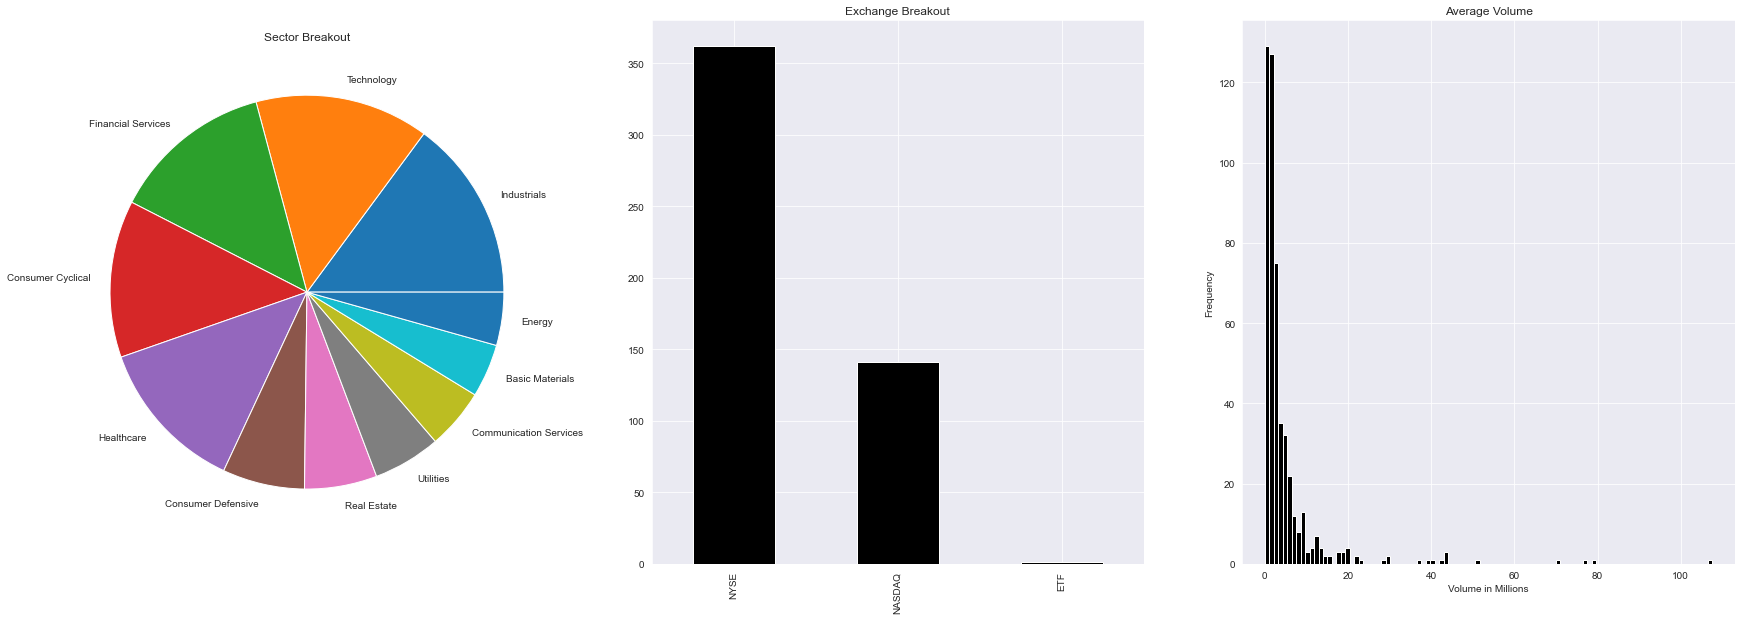

In [304]:
# little bit of eda
fig, axes = plt.subplots(1,3,figsize=(30,10))
ax1 = stocks.sector.value_counts().plot(kind='pie',ax= axes[0])
ax1.set_title('Sector Breakout')
ax1.set_ylabel('')
ax2 = stocks.exchangeShortName.value_counts().plot(kind='bar',ax= axes[1],color='black')
ax2.set_title('Exchange Breakout')
ax3 = (stocks.volAvg/1000000).plot(kind='hist',ax= axes[2],color='black',bins=100)
ax3.set_title('Average Volume')
ax3.set_xlabel('Volume in Millions')
ax3.ticklabel_format(useOffset=False, style='plain')
plt.show()

quick notes- volume positively skewed

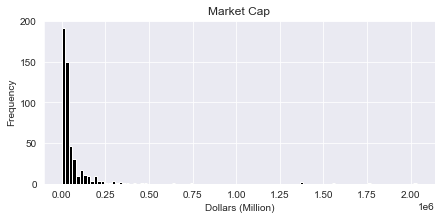

In [305]:
#further look at marketcap
plt.subplots(1,1,figsize=(7,3))
(stocks.mktCap/1000000).plot(kind = 'hist',bins = 100,color='black')
plt.title('Market Cap')
plt.xlabel('Dollars (Million)')
plt.show();

quick notes - marketcap positive skew as as well

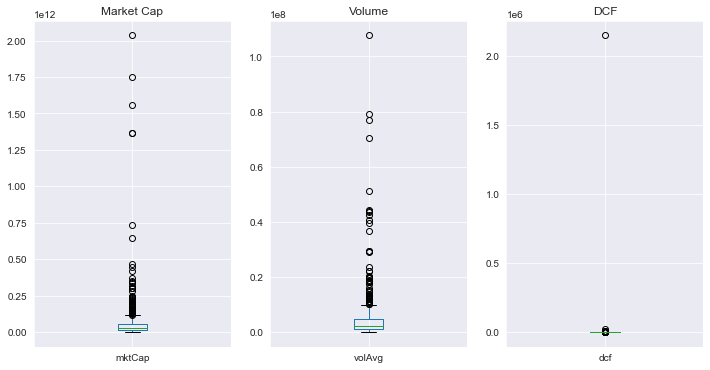

In [306]:
fig, axes = plt.subplots(1,3,figsize=(12,6))
ax1 = stocks.mktCap.plot(kind='box',ax=axes[0])
ax1.set_title('Market Cap')

ax1 = stocks.volAvg.plot(kind='box',ax=axes[1])
ax1.set_title('Volume')

ax1 = stocks.dcf.plot(kind='box',ax=axes[2])
ax1.set_title('DCF')
plt.show();

quick notes - huge outlier for stock DCF. would be interesting to see who that is...

In [307]:
display(stocks.dcf.describe())
print()
display(stocks[stocks.dcf == stocks.dcf.max()])
##Host hotels apparently!

count       499.00
mean       4533.01
std       96312.25
min        -288.71
25%          48.43
50%          98.07
75%         177.04
max     2151560.00
Name: dcf, dtype: float64

symbol  price  beta     volAvg       mktCap  lastDiv       range  changes  \
299    HST  16.59  1.22 8173086.00  11702586400     0.20  7.86-17.43     0.23   

                   companyName currency  ...      city     state    zip  \
299  Host Hotels & Resorts Inc      USD  ...  Bethesda  MARYLAND  20817   

    dcfDiff        dcf                                              image  \
299    7.69 2151560.00  https://financialmodelingprep.com/image-stock/...   

        ipoDate defaultImage isEtf isActivelyTrading  
299  1998-12-29            0     0                 1  

[1 rows x 34 columns]

quick notes - column median indicates there is something wrong with this value.

## L 1.2

In [308]:
#create usable range columns, look @ range
lower = stocks.range.apply(lambda x: np.nan if x == 'null-null' else float(x.split('-')[0]))
upper = stocks.range.apply(lambda x: np.nan if x == 'null-null' else float(x.split('-')[1]))

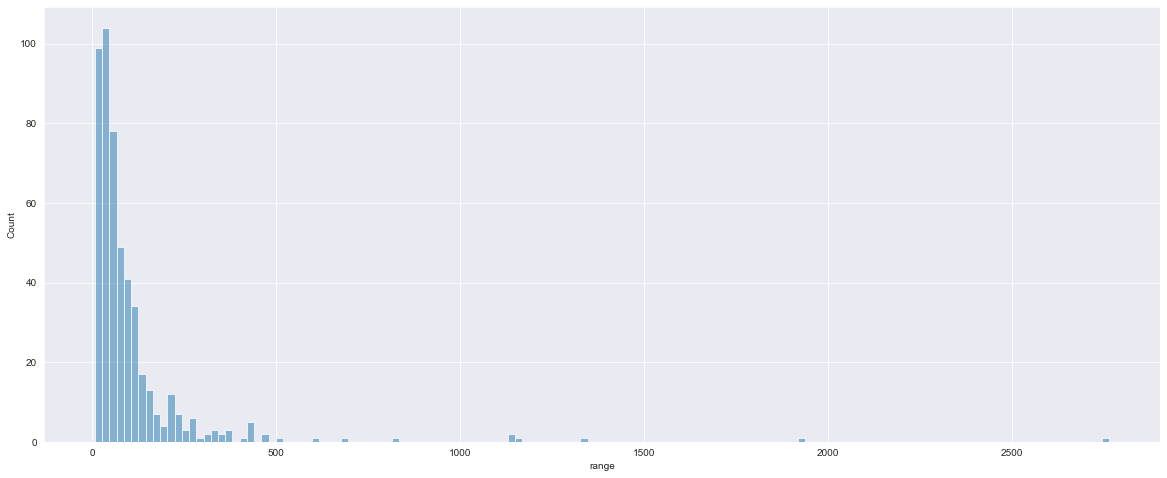

In [309]:
fig, axes = plt.subplots(1,1,figsize=(20,8))
a1 = sns.histplot(upper-lower,ax=axes,palette='Paired',alpha=.5)
plt.title('')
plt.show()

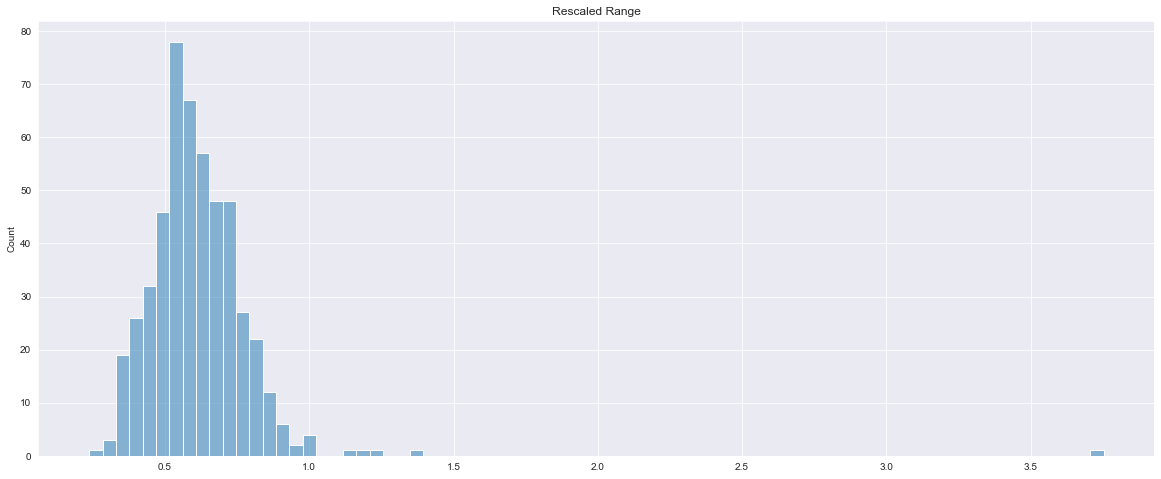

In [310]:
#not in review, but interesting to think about
#rescale to normalize column
fig, axes = plt.subplots(1,1,figsize=(20,8))
scaled = (upper-lower) / stocks.price ##scale by current stock price – shows scaled range for comparison
a1 = sns.histplot(scaled,ax=axes,palette='Paired',alpha=.5)
plt.title('Rescaled Range')
plt.show()

quick notes - notice most companies' range is smalleer than their total stock price, but some are multiples! Good outliers to check


## L 1.3

In [311]:
#quick one sample 2 tail t test against mean of 0
result = scipy.stats.ttest_1samp(lower,0,nan_policy='omit')
result

Ttest_1sampResult(statistic=12.73151732156874, pvalue=2.2511057497041488e-32)

In [312]:
#two sample t test
#equals
result = scipy.stats.ttest_ind(stocks.volAvg,etfs.volAvg,nan_policy='omit')
print(result)

#less than.. 
#result = scipy.stats.ttest_ind(stocks.volAvg,etfs.volAvg,nan_policy='omit',alternative = 'less')
##above throws error due to nans, therefore...
result = scipy.stats.ttest_ind(stocks[stocks.volAvg.notnull()].volAvg,etfs[etfs.volAvg.notnull()].volAvg,alternative='less')
print(result)

Ttest_indResult(statistic=-7.457456896404115, pvalue=3.4238893530203724e-13)
Ttest_indResult(statistic=-7.457456896404115, pvalue=1.7119446765104616e-13)


quick notes – above shows test of sample means, stocks vs etfs.. Shows etfs have higher average vol on av for second test, u1 != u2 for first test

## L 2.1 <a id='L2'></a> 

In [313]:
stocks2 = stocks.drop(index=stocks[stocks.dcf >= 500].index)
stocks2 = stocks2[stocks2.state.isin(['CALIFORNIA','TEXAS'])]

/Users/verbeck/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


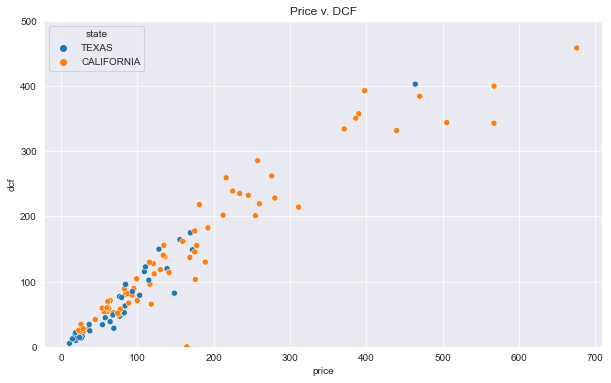

In [314]:
#quick scatter plot, just playing around with looking @ variables against one another
fig, axes = plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(stocks2.price,stocks2.dcf,ax=axes,hue=stocks2.state)
plt.title('Price v. DCF')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim([0,500])
plt.show();

In [315]:
scipy.stats.ttest_ind(stocks2[stocks2.state=='CALIFORNIA'].dcf,stocks2[stocks2.state=='TEXAS'].dcf,alternative='greater')

Ttest_indResult(statistic=3.8549532561913313, pvalue=9.939989114994294e-05)

quick notes - the above shows that companies from california have higher on average dcfs than texas. chart pattern interesting 


## L 2.2

In [316]:
stocks.head()

symbol  price  beta      volAvg        mktCap  lastDiv        range  \
1  CMCSA  52.72  0.91 17309455.00  241492410000     0.92   31.71-53.6   
2    KMI  14.71  0.99 18544206.00   33310060500     1.05   9.42-20.69   
3   INTC  60.78  0.68 39416670.00  246949134000     1.34  43.61-65.11   
4     MU  91.53  1.31 18021777.00  102391857000     0.00   31.13-93.1   
6     GE  12.56  0.91 79007719.00  110125326000     0.05   5.48-13.35   

   changes            companyName currency  ...          city          state  \
1     0.48           Comcast Corp      USD  ...  Philadelphia   PENNSYLVANIA   
2    -0.58      Kinder Morgan Inc      USD  ...       Houston          TEXAS   
3     0.38             Intel Corp      USD  ...   Santa Clara     CALIFORNIA   
4     3.41  Micron Technology Inc      USD  ...         Boise          IDAHO   
6    -0.20    General Electric Co      USD  ...        Boston  MASSACHUSETTS   

          zip dcfDiff   dcf  \
1       19103   89.99 45.71   
2       77002   -3.50 12.61   
3  95054-1549   78.39 54.44   
4        None  129.05 59.57   
6       02210   21.63 11.49   

                                               image     ipoDate defaultImage  \
1  https://financialmodelingprep.com/image-stock/...  2001-12-07            0   
2  https://financialmodelingprep.com/image-stock/...  2011-02-11            0   
3  https://financialmodelingprep.com/image-stock/...  1971-10-13            0   
4  https://financialmodelingprep.com/image-stock/...  1984-06-01            0   
6  https://financialmodelingprep.com/image-stock/...  1892-06-23            0   

  isEtf isActivelyTrading  
1     0                 1  
2     0                 1  
3     0                 1  
4     0                 1  
6     0                 1  

[5 rows x 34 columns]

/Users/verbeck/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


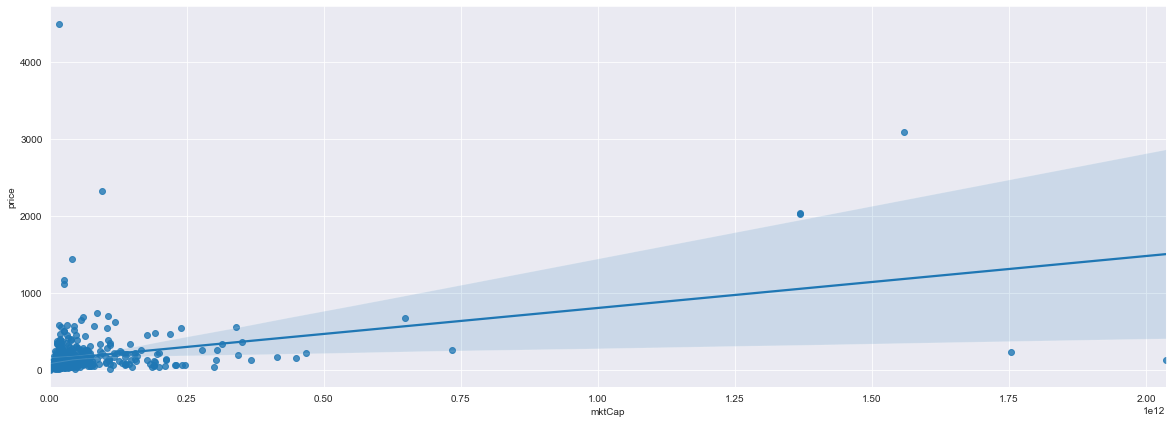

In [317]:
#just take a quick look at example of simple regresion line
fig, axes = plt.subplots(1,1,figsize=(20,7))
ax1 = sns.regplot(stocks['mktCap'],stocks['price'],ax=axes) #x_bins=20) binning regplot creates interesting type of chart for eda
plt.show();

quick notes – obviously these variables may not really be correlated, and both could likely use a logarithmic transformation

## L2.3

In [318]:
#run quick simple reg model w/ other variables to look at output metrics
ols = sm.OLS(stocks.changes,sm.add_constant(stocks.price)) ##add constant.. not sure how I feel about constant inclusion by default as in R or this here
result = ols.fit()
print(result.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.245    
Dependent Variable: changes          AIC:                2858.0545
Date:               2021-03-09 13:38 BIC:                2866.4996
No. Observations:   504              Log-Likelihood:     -1427.0  
Df Model:           1                F-statistic:        164.6    
Df Residuals:       502              Prob (F-statistic): 8.69e-33 
R-squared:          0.247            Scale:              16.927   
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      -1.4614     0.2083   -7.0149   0.0000   -1.8707   -1.0521
price       0.0074     0.0006   12.8297   0.0000    0.0063    0.0085
------------------------------------------------------------------
Omnibus:             291.034      Durbin-Watson:         1.984    
Pro

quick note on standard errror- 68% of resid within 0.0005 of prediction, 95 % of resid will be w/in 0.001 of prediction, 99.7% w/in 0.0015 of prediction

/Users/verbeck/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/verbeck/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


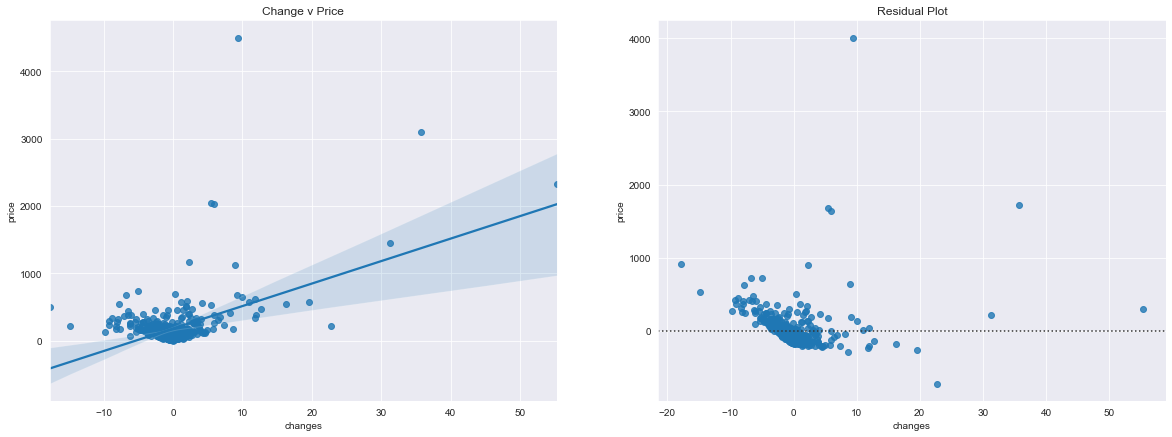

In [319]:
#lets check out a residual plot to test assumptions
fig, axes = plt.subplots(1,2,figsize=(20,7))
ax1 = sns.regplot(stocks.changes,stocks.price,ax=axes[0],ci=95)#x_bins=20) binning regplot creates interesting type of chart for edas
ax1.set_title('Change v Price')
ax2 = sns.residplot(stocks.changes,stocks.price,ax=axes[1])
ax2.set_title('Residual Plot')
plt.show();

quick notes – confidence interval smallest (most confident) when dealing with middle values in data, larger interval on edges  
        --errors larger the further from the mean

Text(0.5, 1.0, 'Error distribution')

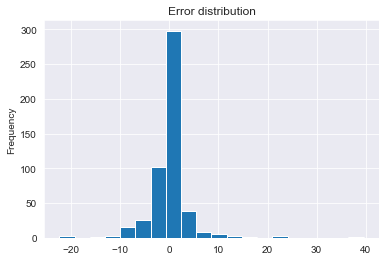

In [320]:
result.resid.plot(kind='hist',bins=20);
plt.title('Error distribution')

In [321]:
#look at residual descriptions
result.resid.describe()

count   504.00
mean      0.00
std       4.11
min     -22.38
25%      -1.13
50%       0.24
75%       1.19
max      39.56
dtype: float64

quick notes – are error assumptions satisfied?   
    --mean errors 0: YES, ols produces mean of 0  
    --errors homoscedastic: NO, residplot shows hetero  
    --errors normal: YES, looks like it  
    --errors independent: YES, no reason to think otherwise. Each is individual security

In [322]:
print('MSE:',result.mse_model)

MSE: 2786.1794139843896


In [323]:
## nice article on simple model evaluation https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

In [324]:
print('RSquared of {} indicates {} % of variance explained by price for changes'.format(round(result.rsquared,2),round(result.rsquared*100)))

RSquared of 0.25 indicates 25 % of variance explained by price for changes


In [325]:
scipy.stats.pearsonr(stocks.changes,stocks.price)

(0.49691567230623973, 8.68697712013755e-33)

## L3.1 <a id='L3'></a> 

In [326]:
#check out bankruptcy data for mr
brupt = getTable('../../FInancesSp500.db','BANKRUPTCY')

In [327]:
##could be interesting for logistic regression and time series later on
brupt['Business Survival'].value_counts()

Company emerged           799
company did not emerge    370
case pending               22
not classified             11
no data                     6
Name: Business Survival, dtype: int64

quick note – I still need to clean this data. will use something with more continuous variables for initial multiple regression review..

In [333]:
#Example multiple reg model
#def model
targ = 'price'
model = ['volAvg','fullTimeEmployees'] + [targ]

#def data
DATA = stocks[model].dropna(axis=0).drop(columns=[targ],axis=1)
TARGET = stocks.loc[DATA.index,targ]

#run and display
ols = sm.OLS(TARGET,sm.add_constant(DATA))
result = ols.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS              Adj. R-squared:     0.040    
Dependent Variable:   price            AIC:                7208.5805
Date:                 2021-03-09 13:40 BIC:                7221.2423
No. Observations:     503              Log-Likelihood:     -3601.3  
Df Model:             2                F-statistic:        11.48    
Df Residuals:         500              Prob (F-statistic): 1.34e-05 
R-squared:            0.044            Scale:              97475.   
--------------------------------------------------------------------
                   Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
--------------------------------------------------------------------
const             172.7948  16.2469 10.6355 0.0000 140.8741 204.7154
volAvg             -0.0000   0.0000 -3.3012 0.0010  -0.0000  -0.0000
fullTimeEmployees   0.0004   0.0001  3.9876 0.0001   0.0002   0.0007
--------------------------------------------------------------------
Omnibus:              745.256      Durbin-Watson:         1.878     
Prob(Omnibus):        0.000        Jarque-Bera (JB):      170905.256
Skew:                 7.994        Prob(JB):              0.000     
Kurtosis:             91.876       Condition No.:         12730709  
====================================================================
* The condition number is large (1e+07). This might indicate
strong multicollinearity or other numerical problems.
"""

quick notes – very low adj r squared (adj accounts for # vars in model) shows vol, employees don't explain alot of variance in price. both statistically sig

In [374]:
#check out rmse
RMSE = np.sqrt(result.mse_resid) # or np.sqrt(result.ssr/result.df_resid)
print('RMSE: {}'.format(RMSE))
print('F TEST p-value: {}n\n'.format(result.f_pvalue))

RMSE: 312.20975674409146
F TEST p-value: 1.3392936066829341e-05n



    
  
    
quick notes – 68% of predictions will be w/in 312 of true value, 95% w/in 624, and 99.7% w/in 936  

    --- f test shows < 0.01% chance that all betas == 0
    
    !!!RMSE is really just the standard deviation of the residuals. Great way to think about it  
    
    --- note difference between confidence interval and prediction interval (mean of all vs. single)

## L3.2

In [378]:
#basic interaction models

#def model
targ = 'price'
model = ['volAvg','fullTimeEmployees'] + [targ]

#def data
DATA = stocks[model].dropna(axis=0).drop(columns=[targ],axis=1)
TARGET = stocks.loc[DATA.index,targ]

#define interaction term
DATA['AVG * Employees'] = DATA['volAvg']*DATA['fullTimeEmployees']

#run and display
ols = sm.OLS(TARGET,sm.add_constant(DATA))
result = ols.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS              Adj. R-squared:     0.040    
Dependent Variable:   price            AIC:                7209.3485
Date:                 2021-03-09 14:13 BIC:                7226.2308
No. Observations:     503              Log-Likelihood:     -3600.7  
Df Model:             3                F-statistic:        8.062    
Df Residuals:         499              Prob (F-statistic): 2.97e-05 
R-squared:            0.046            Scale:              97431.   
--------------------------------------------------------------------
                   Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
--------------------------------------------------------------------
const             160.9398  19.4600  8.2703 0.0000 122.7062 199.1734
volAvg             -0.0000   0.0000 -0.6262 0.5315  -0.0000   0.0000
fullTimeEmployees   0.0006   0.0002  3.3270 0.0009   0.0002   0.0010
AVG * Employees    -0.0000   0.0000 -1.1062 0.2692  -0.0000   0.0000
--------------------------------------------------------------------
Omnibus:             744.646     Durbin-Watson:        1.868        
Prob(Omnibus):       0.000       Jarque-Bera (JB):     171536.560   
Skew:                7.978       Prob(JB):             0.000        
Kurtosis:            92.051      Condition No.:        2582157029484
====================================================================
* The condition number is large (3e+12). This might indicate
strong multicollinearity or other numerical problems.
"""

In [380]:
np.sqrt(result.mse_resid)

312.1399337810879

quick notes – interaction term not sig, didn't increase r2 significantly, RMSE same...   
    ---Exclude interaction for this example to avoid obfuscating base terms

## L3.3

/Users/verbeck/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


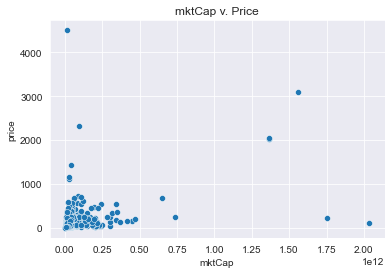

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.016    
Dependent Variable: price            AIC:                7220.7932
Date:               2021-03-09 14:27 BIC:                7233.4550
No. Observations:   503              Log-Likelihood:     -3607.4  
Df Model:           2                F-statistic:        5.204    
Df Residuals:       500              Prob (F-statistic): 0.00579  
R-squared:          0.020            Scale:              99871.   
------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
------------------------------------------------------------------
const                0.0000   0.0000  2.7132 0.0069  0.0000 0.0000
mktCap               0.0000   0.0000  9.9338 0.0000  0.0000 0.0000
fullTimeEmployees    0.0003   0.0001  2.7132 0.0069  0.0001 0.0005
mktCap2             -0.0000   0.0000 -0.6656 0.5060 -0.0000 0.0000
------------------------------------------------------------------
Omnibus:         705.378   Durbin-Watson:      1.479              
Prob(Omnibus):   0.000     Jarque-Bera (JB):   211448.604         
Skew:            7.014     Prob(JB):           0.000              
Kurtosis:        102.460   Condition No.:      5963662502878911488
==================================================================
* The condition number is large (6e+18). This might indicate
strong multicollinearity or other numerical problems.
"""

In [402]:
#second order models
sns.scatterplot('mktCap','price',data=stocks)
plt.title('mktCap v. Price')
plt.show()
## pretend as if this would be a strong candidate for second order..
#basic interaction models

#def model
targ = 'price'
model = ['mktCap','fullTimeEmployees'] + [targ]

#def data
DATA = stocks[model].dropna(axis=0).drop(columns=[targ],axis=1)
TARGET = stocks.loc[DATA.index,targ]

#define second order term
DATA['mktCap2'] = DATA['mktCap']**2

#run and display
ols = sm.OLS(TARGET,sm.add_constant(DATA))
result = ols.fit()
result.summary2()

quick notes – second order term not adding anything to model here. This is just a random example, so nothing expected 

In [411]:
#what would complete 2nd order model look like for this guy? let's make it

#def model
targ = 'price'
model = ['mktCap','fullTimeEmployees'] + [targ]

#def data
DATA = stocks[model].dropna(axis=0).drop(columns=[targ],axis=1)
TARGET = stocks.loc[DATA.index,targ]

#create complete model#######

#interaction
DATA['mCap * Employees'] = DATA['mktCap'] * DATA['fullTimeEmployees']

#second orders...
DATA['mktCap2'] = DATA['mktCap']**2
DATA['Employees2'] = DATA['fullTimeEmployees']**2
#####

#run and display
ols = sm.OLS(TARGET,sm.add_constant(DATA))
result = ols.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.062    
Dependent Variable: price            AIC:                7198.8070
Date:               2021-03-09 14:33 BIC:                7219.9099
No. Observations:   503              Log-Likelihood:     -3594.4  
Df Model:           4                F-statistic:        9.330    
Df Residuals:       498              Prob (F-statistic): 2.81e-07 
R-squared:          0.070            Scale:              95223.   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0000   0.0000  3.3607 0.0008  0.0000  0.0000
mktCap              0.0000   0.0000  5.2629 0.0000  0.0000  0.0000
fullTimeEmployees   0.0007   0.0002  3.3607 0.0008  0.0003  0.0011
mCap * Employees    0.0000   0.0000  4.1352 0.0000  0.0000  0.0000
mktCap2            -0.0000   0.0000 -0.6763 0.4991 -0.0000  0.0000
Employees2         -0.0000   0.0000 -4.1270 0.0000 -0.0000 -0.0000
------------------------------------------------------------------
Omnibus:         744.848   Durbin-Watson:      1.503              
Prob(Omnibus):   0.000     Jarque-Bera (JB):   254190.538         
Skew:            7.772     Prob(JB):           0.000              
Kurtosis:        112.027   Condition No.:      6807685453146434560
==================================================================
* The condition number is large (7e+18). This might indicate
strong multicollinearity or other numerical problems.
"""

quick notes – while still very low variance explanation in model, notable that the randomly added interaction term and one second order term turned out to be significant.

In [420]:
#qualitative variable addition.. let's do sector and use energy as reference variable

#def model
targ = 'price'
model = ['sector'] + [targ]

#def data
DATA = stocks[model].dropna(axis=0).drop(columns=[targ],axis=1)

###Create dummies and drop###
reference_col = 'Technology'
DATA = pd.get_dummies(DATA).drop(columns=['sector_'+reference_col])

TARGET = stocks.loc[DATA.index,targ]

#run and display
ols = sm.OLS(TARGET,sm.add_constant(DATA))
result = ols.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                    OLS                   Adj. R-squared:          0.032    
Dependent Variable:       price                 AIC:                     7234.4132
Date:                     2021-03-09 14:41      BIC:                     7280.8616
No. Observations:         504                   Log-Likelihood:          -3606.2  
Df Model:                 10                    F-statistic:             2.651    
Df Residuals:             493                   Prob (F-statistic):      0.00370  
R-squared:                0.051                 Scale:                   98178.   
----------------------------------------------------------------------------------
                                Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
----------------------------------------------------------------------------------
const                          183.0318  36.9267  4.9566 0.0000  110.4788 255.5848
sector_Basic Materials         -37.9518  76.3295 -0.4972 0.6193 -187.9231 112.0195
sector_Communication Services   85.6486  72.7371  1.1775 0.2396  -57.2643 228.5615
sector_Consumer Cyclical       121.9947  53.6097  2.2756 0.0233   16.6629 227.3264
sector_Consumer Defensive      -81.1136  65.2009 -1.2441 0.2141 -209.2195  46.9923
sector_Energy                 -135.0686  76.3295 -1.7695 0.0774 -285.0399  14.9027
sector_Financial Services      -50.5005  53.1876 -0.9495 0.3428 -155.0027  54.0018
sector_Healthcare               34.3654  53.8294  0.6384 0.5235  -71.3979 140.1287
sector_Industrials             -35.8148  51.6973 -0.6928 0.4888 -137.3891  65.7595
sector_Real Estate             -62.7135  68.0894 -0.9210 0.3575 -196.4947  71.0677
sector_Utilities              -118.9829  69.7848 -1.7050 0.0888 -256.0952  18.1295
----------------------------------------------------------------------------------
Omnibus:                  739.229           Durbin-Watson:              1.905     
Prob(Omnibus):            0.000             Jarque-Bera (JB):           157713.562
Skew:                     7.873             Prob(JB):                   0.000     
Kurtosis:                 88.219            Condition No.:              10        
==================================================================================

"""

quick notes – low r2, significant ftest (@ least 1 beta != 0)  
    ---can say that avg. price for consumer cyclical > that of technology.....can't say whether others are significantly different based on t-tests!

In [424]:
#demonstrate difference in price b/t sectors for example
stocks.groupby('sector')['price'].describe()

count   mean    std   min   25%    50%    75%     max
sector                                                                       
Basic Materials         22.00 145.08 145.66 19.73 55.53 106.18 164.86  680.68
Communication Services  25.00 268.68 550.75 12.29 31.93  64.49 133.97 2036.86
Consumer Cyclical       65.00 305.03 732.08 10.92 45.11 103.53 161.00 4500.84
Consumer Defensive      34.00 101.92  72.37 23.17 50.02  79.64 128.97  331.00
Energy                  22.00  47.96  33.81 11.12 22.05  41.02  65.31  148.57
Financial Services      67.00 132.53 131.51 15.34 48.92  93.95 162.32  695.12
Healthcare              64.00 217.40 192.95 14.85 78.39 166.29 275.57 1118.88
Industrials             75.00 147.22 105.91  0.00 64.34 117.80 202.59  577.73
Real Estate             30.00 120.32 121.89 16.59 45.39  87.42 150.58  648.34
Technology              72.00 183.03 140.80 14.56 81.92 141.31 235.59  567.19
Utilities               28.00  64.05  29.58 19.39 44.27  62.12  79.65  141.63

quick notes – sure enough, this backs up the model.  
--we can see diff(avgs) b/t sectors here are consistent b/t model and data.  
very long and impractical equation below further confirms!

In [435]:
round(stocks.groupby('sector')['price'].describe().loc['Consumer Cyclical','mean'] - stocks.groupby('sector')['price'].describe().loc['Technology','mean'],2) == round(result.params['sector_Consumer Cyclical'],2)

True

## L4.1  <a id='L4'></a> 